In [1]:
'''
!pip install powerlaw
!pip install cdlib
!pip install Node2Vec
!pip install panda
!pip install sparsebm
!pip install dgl
!pip install torch
!pip install torch_geometric
!pip install lightning
!pip install torcheval
!pip install torchmetrics
!pip install imblearn
'''


'\n!pip install powerlaw\n!pip install cdlib\n!pip install Node2Vec\n!pip install panda\n!pip install sparsebm\n!pip install dgl\n!pip install torch\n!pip install torch_geometric\n!pip install lightning\n!pip install torcheval\n!pip install torchmetrics\n!pip install imblearn\n'

 # Predict link in Pollination network 
 ## by yuval bloch (318304672)

## abstract

Pollination networks play a crucial role in maintaining the stability and diversity of ecosystems. They depict interactions between plant species and their pollinators, providing valuable insights into community dynamics and ecological relationships. Understanding the structure and dynamics of these networks is essential for conserving biodiversity and ensuring efficient pollination services.

Link prediction aims to forecast missing or potential interactions between species in the network, uncovering hidden relationships and unveiling the mechanisms shaping the network's structure. Despite its significance, there exists a dearth of information concerning a data-driven approach to tackle this issue. In fact, during the recent Eco-Net Conference held at BGU, this was acknowledged as a major unanswered question within the field.

This project aims to bridge this knowledge gap by evaluating methods that have emerged in recent years, and their comparison with more traditional approaches. Hopefully, this endeavor will provide guidance to future scientists on the efficient utilization of machine learning for predicting missing links.

To accomplish this, a high-quality dataset containing observed interactions within a pollination network will serve as the foundation for training and assessing our prediction models. Multiple methods will be explored, commencing with traditional stochastic block modeling, progressing to machine learning techniques based on node embedding and heuristics, and culminating with the advanced deep learning SEAL algorithm.

The "Dofiana" reserve in southern Spain has been selected as the study area, owing to extensive data collection on the pollination network in the 1990s. The project will assess whether a model trained on this specific location can accurately predict the pollination network in a distinct area with a similar climate but a diverse ecosystem, such as the Delphi reserve in Greece, if so the model also can use here in Isreal as we share a similar climate with those country. 

## ecological network 
Ecosystem stability stands out as a crucial factor for us, denoting its ability to endure both natural shifts and the growing impacts of human activities. The interest in the stability of ecosystems soared after Robert May's mathematical insights revealed the inherent challenge of achieving stability in systems with numerous components and random connections. Subsequent studies have demonstrated that ecosystems attain a degree of stability due to their highly structured nature, shaped over millions of years through co-evolution under diverse biotic and abiotic conditions.

The structured composition of ecological networks proves to be just as vital for stability as factors like biomass or biodiversity. However, establishing connections within ecological networks is notably more intricate than tracking species abundance. These connections must be precisely recorded at the moment they occur. Moreover, ecological networks comprise diverse types of connections, ranging from win-lose relationships in predator-prey dynamics to lose-lose relationships in competition and win-win relationships in plant-pollinator interactions.

In summary, delving into the structure of ecological networks is a highly complex yet indispensable endeavor. Much like in other intricately complicated systems, the application of computational tools and spesificly machine learnining can significantly aid in unraveling these complexities. The underlying complexity implies that a comprehensive understanding of ecological network structures may remain a perpetual challenge. Nevertheless, recognizing and studying their structured nature becomes paramount, considering its profound impact on the system's resilience to the changes induced by human activities. Therefore, our focus should persistently be on enhancing our understanding of these structures to fortify the system's ability to withstand alterations.


## Doñana National Park 
Doñana National Park, located in southwestern Spain within the autonomous community of Andalusia, stands as a significant and diverse protected area. It is celebrated for its abundant biodiversity, distinctive ecosystems, and its critical role as a migratory bird habitat. I have chosen this park as a sample ecosystem for the project for several reasons.

### High-Quality Data Source:

 Doñana serves as a Long-Term Ecological Research (LTER) site, providing an invaluable opportunity for scientists to accumulate data over extended periods. Consequently, a wealth of high-quality data has been gathered through various research initiatives.

### Relevance to Israel:

In Israel, there is a notable absence of comprehensive data on plant-pollinator relationships within our ecosystems. By selecting Doñana as a reference ecosystem, I aim to leverage transfer learning from an analogous setting. Several shared characteristics between Doñana and Israeli ecosystems make it a promising model:
- Diverse ecosystems on a small scale.
- Varied habitats encompassing marshlands, dunes, Mediterranean scrubland, and pine forests.
- Serving as a stopover for migratory birds traveling between Europe and Africa.
- Facing a risk of desertification.

### Monitored Human Impact on a Large Natural Ecosystem:

Doñana provides an opportunity to study a large-scale natural ecosystem while meticulously monitoring the influence of human activities. This dual focus enables us to gain insights into both the intrinsic dynamics of the natural system and the repercussions of human intervention.

By leveraging the high-quality data from Doñana and drawing parallels with the ecological landscape in Israel, this project aims to enhance our understanding of plant-pollinator relationships, contribute to the body of ecological knowledge, and inform sustainable conservation practices.nsic dynamics of the natural system and the repercussions of human intervention.
By leveraging the high-quality data from Doñana and drawing parallels with the ecological landscape in Israel, this project aims to enhance our understanding of plant-pollinator relationships, contribute to the body of ecological knowledge, and inform sustainable conservation practices.

## Challenges
### Self-Supervised Learning
In contrast to the conventional categorization of machine learning problems into supervised, partially supervised, and unsupervised learning, link prediction introduces a distinctive challenge known as "self-supervised learning." This implies that the characteristics to be predicted are identical to the parameters used for prediction. This introduces various challenges, ranging from the intricacies of training-testing splits to the extraction of pertinent features and the learning process itself.

### Lack of Ground Truth
The complexities involved in collecting data on ecological networks make dataset creation a formidable task. Consequently, even the most robust datasets are often incomplete, featuring numerous missing connections. Furthermore, recorded interactions may not conclusively demonstrate real connections and could, in fact, be random events. Consequently, model training and testing must be conducted on data that may not be entirely accurate.

### Imbalanced Data
Ecological networks exhibit sparsity, resulting in a surplus of negative data points (non-connections) compared to positive data points (connections). Addressing this issue during model training becomes imperative to ensure the model's effectiveness.

### Complex System with Limited Data
The structural composition of ecological networks has evolved over hundreds of millions of years of coevolution, giving rise to highly intricate patterns. Utilizing machine learning techniques to uncover these patterns with a limited dataset (where the number of possible connections equals the product of the plant and pollinator quantities) is inherently restrictive. Consequently, achieving flawless results in any model is an unrealistic expectation, and the focus remains on delivering the best possible outcomes given the constraints.

## importing librraris
I rely on several main libraries for my project, along with various smaller ones. For working with data, I use numpy and pandas. For network data structure and simple network analysis, I use networkX. For statistical tests, I rely on scipy. For visualizations, I utilize matplotlib and seaborn. For simple learning tasks, I implement sklearn. For deep learning tasks, I employ torch. Additionally, I use lightning to simplify my deep learning work.

In [2]:



# General libraries
import numpy as np
import math
import pandas as pd
from scipy.optimize import curve_fit
import random
import warnings
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from scipy.sparse import coo_matrix

# Network analysis
import networkx as nx
from networkx.algorithms import bipartite
from sparsebm import ModelSelection
from scipy.sparse import coo_matrix
import powerlaw
from scipy.stats import expon ,kstest,lognorm 
from networkx.algorithms.community import greedy_modularity_communities ,naive_greedy_modularity_communities
from networkx.algorithms import bipartite




# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


# Deep learning torch basic
import torch
from torch.utils.data import TensorDataset , DataLoader
from torch.nn import Linear, Parameter
from torchmetrics.classification import BinaryROC , PrecisionRecallCurve ,ConfusionMatrix
import torch.nn as nn
from torch.nn import ModuleList, Linear, Conv1d, MaxPool1d
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import random_split


# Torch geometric GNN tools
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.nn import MLP, GCNConv, global_sort_pool, SortAggregation
import torch_geometric.utils as utils
import torch_geometric.data


# Torch optimize
from torch.optim import SGD 
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Torch lightning
import lightning as L
from lightning.pytorch.callbacks.early_stopping import EarlyStopping


## first look on the network data
first I load the data, as data frame, the netowrk reprasnt adjency bipraite matrix 

In [3]:
df  = pd.read_csv("C://Users//יובל//OneDrive//Desktop//מקורות לפרוויקט//web-of-life_2023-08-21_080918//M_PL_016.csv")
df = df.set_index('Unnamed: 0')

this biparte adjancy matrix isnt format that networxX know how to handle so I will change it to full   adjancy matrix

In [4]:
'''
the bipartite network made of 2 node type, insect and plant
to make from it a full adjacency matrix we should add all the plant-plant and insect-insect connections to the table as 0
'''
# Recognize the 2 types of nodes
plant = df.index.values
insect = df.columns

# Build the diffrent area of the full matrix
insect_insect = pd.DataFrame(0, index=plant, columns=plant)
plant_plant = pd.DataFrame(0, index=insect, columns=insect)
insect_plant = df
plant_insect = df.transpose()

# Add all together
up = pd.concat([insect_insect, insect_plant], axis=1)
down = pd.concat([plant_insect, plant_plant], axis=1)
full_matrix = pd.concat([up, down], axis=0)

# Create the matrix
network = nx.from_pandas_adjacency(full_matrix)


### let give a look to the network
the point in the right side of the graph are insect and the pint in the left side of the grph are plant the line are connection

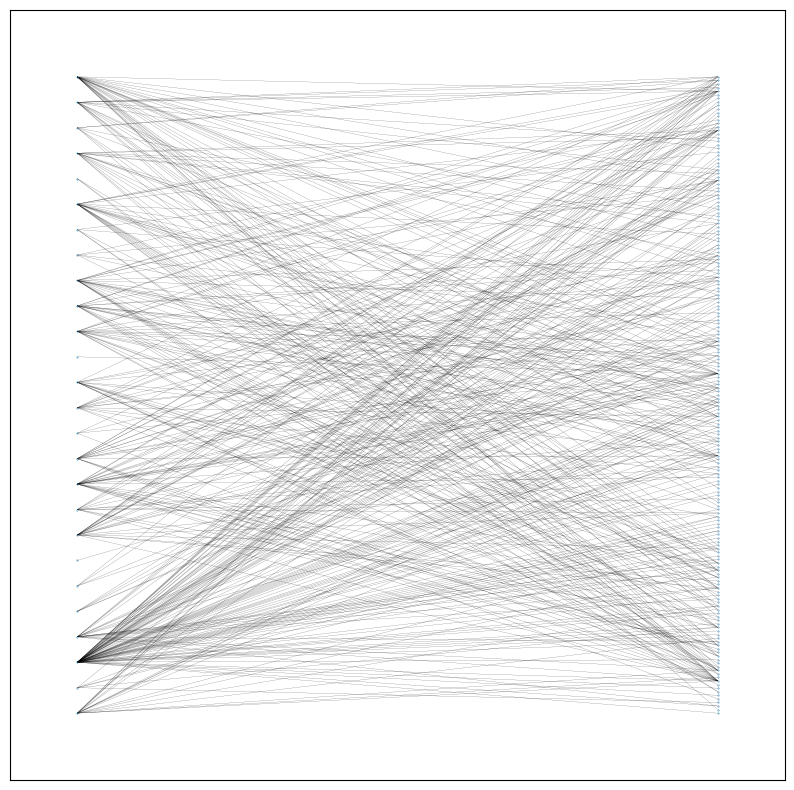

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw_networkx(network,with_labels=False, pos = nx.drawing.layout.bipartite_layout(network, plant), width = 0.1 , node_size =0.1)

### importent plant and polinnator
already from this visulstion we can learn a little bit, as you can see the degree of nodes in both side of the graph has high variability, that phenomena is the diffrent batween speclist and genrlist specises and realy worth a scond look. but before I give another look on the distrbution it self it good oppertiunity to make sainity check by looking on the most connected spicie and see if they are knowing as highely genrlist spcie 

In [6]:
plt.rcdefaults()

# Compute degree sequence of the network with respect to the plant nodes
(insect_degree, plant_degree) = bipartite.degrees(network, plant)
plant_sort =  pd.DataFrame(plant_degree).sort_values(by=1, ascending=False)
insect_sort =  pd.DataFrame(insect_degree).sort_values(by=1, ascending=False)

### first lets take a look no the highst connection plant 

In [7]:
plant_sort.iloc[0:4]

,0,1
2,Daphne gnidium,86
25,Cistus libanotis,28
9,Cistus salvifolius,26
20,Calluna vulgaris,23


Daphne gnidium stands out as the most connected species in the dataset, a characteristic that could be inherent to the species or possibly influenced by biases in the dataset. In the case of Daphne gnidium, it exhibits a uniquely low reproduction success during pollination. To compensate for this, the plant employs strategies to make itself highly attractive to pollinators, ensuring a higher chance of reproductive success. This involves having a high nectar yield per flower, a substantial number of flowers, and a conspicuous pollination area. However, since Daphne gnidium is a nocturnal flower and pollination occurs at night, there is limited available data on its pollination rates. This makes it challenging to definitively determine whether the observed high connectivity of Daphne gnidium is due to biases in the research methodology or if the species genuinely holds a more central role in the pollination network than any other plant.

### now let take a look on the four most importent insect 

In [8]:
insect_sort.iloc[0:4]

,0,1
9,Diptera sp1 M_PL_016,17
95,Apis mellifera,14
174,Phthiria sp1 M_PL_016,11
163,Eristalis tenax,10


We possess clearer insights into the role of insects due to the significance of researching optimal pollinators for enhancing agricultural productivity. In alignment with prior knowledge, the data underscores the prominence of standout pollinators, namely, the Pollinating Fly (Diptera) and the Honey Bee (Apis mellifera). Both are globally recognized as the most important and versatile pollinators.

### degree distrbution 
In addition to examining the role of individual plants or pollinators, there are discernible patterns in the degree distribution that offer insights into the structure of the ecological system. before we try to use analitical tool to understand the distrubution I will plot the degree distrubtion and saw what we can learn just by looking on it

Text(0.5, 0.98, 'all')

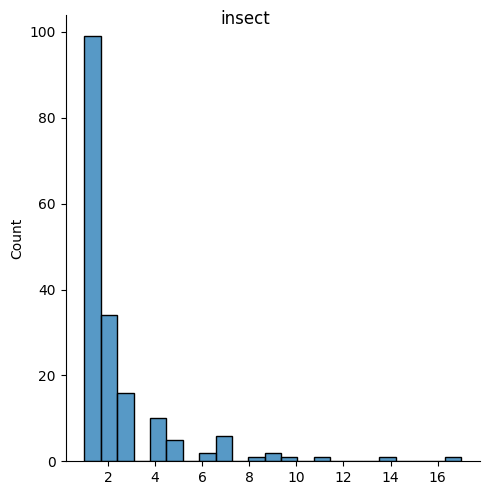

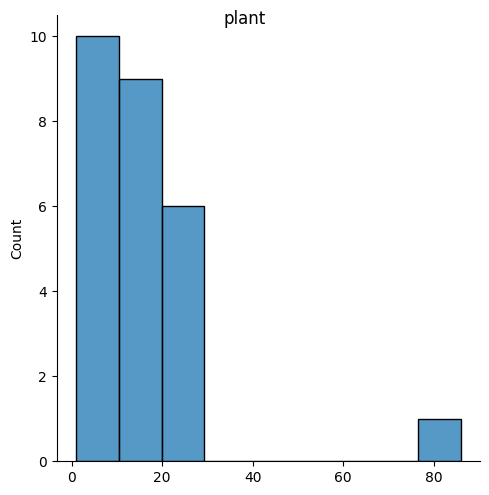

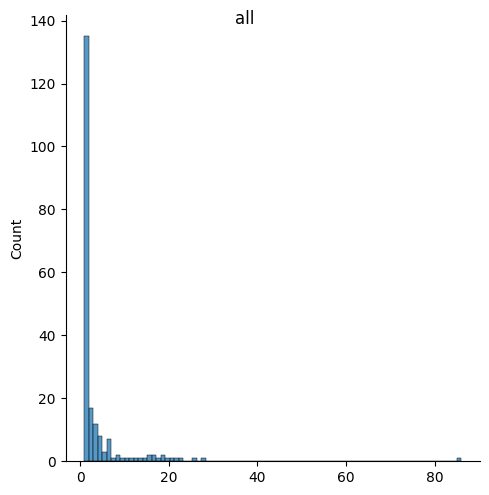

In [9]:
# Extract the degree values from the tuples
insect_degree_list = [d for n, d in insect_degree]
plant_degree_list = [d for n, d in plant_degree]
all_degree_list = insect_degree_list +plant_degree_list
# Plot the degree distribution of the insect nodes
insect_plot = sns.displot(insect_degree_list)
insect_plot.fig.suptitle('insect')

# Plot the degree distribution of the plant nodes
plant_plot = sns.displot(plant_degree_list )
plant_plot.fig.suptitle('plant')

# Plot the degree distribution of the plant nodes
all_degree_plot = sns.displot(all_degree_list )
all_degree_plot.fig.suptitle('all')

Upon initial examination of the entire dataset graph, my suspicion grew regarding the unusually high number of interactions involving Daphne gnidium, prompting considerations of potential research bias. The distribution departs from a normal distribution, so the next step will try to find distrbution fit good to the data .

### power law distrbution 
 from domain knolge I natruly suspect power law that we can find in many natrul stystem and creat by the machnizem of the "rich get richer" . the furmola for power law distrbution is $$ Pr(k) = ck^{-a} $$ on a log(x) log(y) scale power law distrbution look lik stirght line of the formula $$ax+c$$ lets look on the log log graph and see if it make sense 

Calculating best minimal value for power law fit
alpha =  1.8305168478546119 c =  4.618422998857929


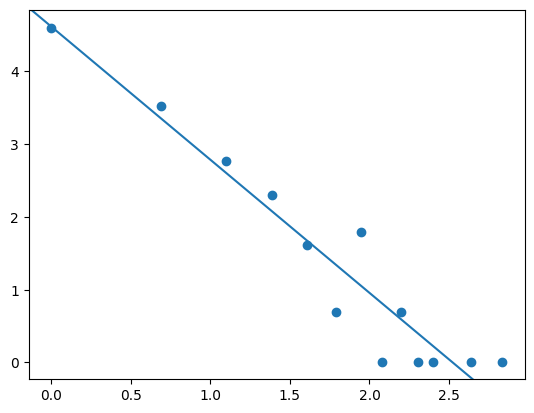

In [10]:
# Plotting on log-log distribution for proving free scale property
import powerlaw
result = powerlaw.Fit(insect_degree_list)
#print('p = ' + str(powerlaw.compute_power_law_p_val(results)))
# Calculate distribution
Lbins = np.array([])
Lhist = np.array([])
hist, bins = np.histogram(insect_degree_list  , bins=np.linspace(0, 90, num=91))
bins = np.delete(bins, 90, axis=0)

# Scaling distribution and bins by log function
for i in range(hist.size):
    if hist[i] > 0 and bins[i] > 0:
        Lbins = np.append(Lbins, math.log(bins[i]))
        Lhist = np.append(Lhist, math.log(hist[i]))

# Finding the best line to explain the data
reg = LinearRegression().fit(Lbins[:, None], Lhist)
b = reg.intercept_
m = reg.coef_[0]

# Plot the line
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.scatter(Lbins, Lhist)

print("alpha = " , -m , "c = " ,b )

as you can see its look kind of correct but not perfectly to powerlaw distrbutin with the parmter alpha = 1.83 and c = 4.618 its an evidance but doesnt a proof to actual understand if its the best first we should compre it to other dstrbution using maximum liklihood, first I will find the best parmters usind max liklihhod and the python library powerlaw 

In [11]:


results =powerlaw.Fit(all_degree_list,  xmin=1)
print("alpha = " , results.power_law.alpha)

alpha =  2.317271392973371


the alpha now is a little diffrent which make sense as the stright line approximtion is less acurate, now we can compare it to other distrbution that in human eyes can look similar, for this I will use liklihood ratio 

In [12]:



distribution_list = ['lognormal', 'exponential',  \
      'stretched_exponential', 'lognormal_positive' ]
for distribution in distribution_list:
    R, p = results.distribution_compare('power_law', distribution)
    print("powerlaw is better then " + distribution + " " +  str(R > 0 )+ 
          " in significent of p = " + str(p))
print("alpha = " + str(results.power_law.alpha))
R, p = results.distribution_compare('lognormal', 'stretched_exponential')
print(R,p)
print(results.power_law.xmin)

powerlaw is better then lognormal False in significent of p = 0.23982099511324462
powerlaw is better then exponential True in significent of p = 4.15248262731666e-08
powerlaw is better then stretched_exponential True in significent of p = 0.0002755295135269247
powerlaw is better then lognormal_positive True in significent of p = 6.210433441422054e-08
alpha = 2.317271392973371
5.9515791813069585 0.000389094368704895
1.0


C:\anconda3\lib\site-packages\powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
C:\anconda3\lib\site-packages\powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
C:\anconda3\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


the result show that the liklihood of the power law distrbution is sgnificently higher then those of exponential distrbution, stretched_exponential and lognormal_positive. it unsagnifaicntly worst then lognormal distrbution, which mean that we cant yet detrmine which one describe our data in the best way 

### lognormal vs power law


as my statisticl tolls cant choose which statics distrbution describe my data in the best way I will try look on it with my own eyes and see which statistc descrption are much usefull for that I will plot probabilty density graph for both of them, and try to see how hold usefull charcter that much my data. to make it nore I will plot it above normilized hight histogram of ny real data

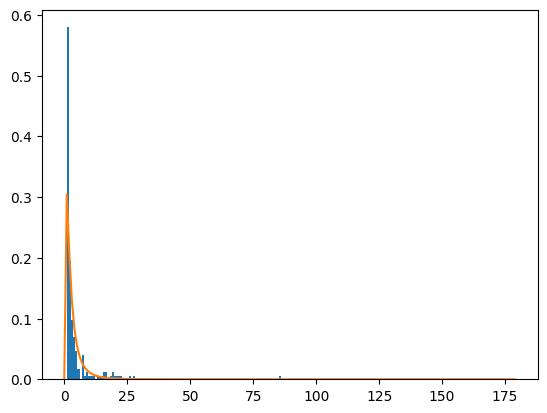

In [13]:

ln  = lognorm.fit(insect_degree_list)
mu = np.log(ln[0])
sigma =ln[1]  
x_min = results.power_law.xmin
n = len(insect_degree_list)
x = np.linspace(0, n, n+1)


params2 = lognorm.fit(all_degree_list, method='MLE', floc=0)
counts, bins = np.histogram(all_degree_list)
plt.hist(all_degree_list, 100 ,density=True )
plt.plot(x, lognorm.pdf(x, *params2), '-',
         label='Log-Normal fitting using lognorm.fit()')




plt.show()


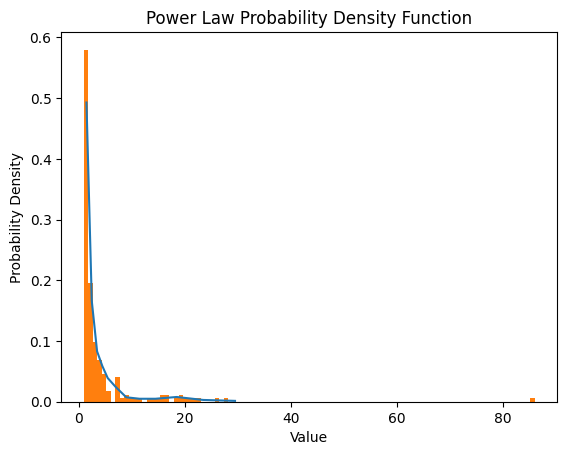

In [14]:
fit =powerlaw.Fit(all_degree_list,  xmin=1)

# Plot the PDF
fig, ax = plt.subplots()
fit.plot_pdf()
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Power Law Probability Density Function')
# Set x-axis to linear scale
ax.set_xscale('linear')
plt.hist(all_degree_list, 100 ,density=True )

# Set y-axis to linear scale
ax.set_yscale('linear')
plt.show()

looking on this this two plot it clear that the power law distribution more effectively depicts the essential characteristics of our data. It adeptly captures the significant differences in abundance, particularly emphasizing the distinction between instances where the value is '1' and other values. This characteristic aligns with the specific ecosystem under consideration, where numerous specialist insects are observed to exclusively pollinate a single flower.

### what we can learn from the power law distrbution

The power-law distribution arises from the phenomenon known as 'the rich get richer.' In an ecosystem, this distribution can manifest through abundance and coevolution. Species with numerous positive interactions tend to grow in abundance, creating an evolutionary incentive for other species to develop traits that facilitate interactions. This, in turn, contributes to the continued growth of their abundance, establishing a dynamic process in ecological evolution.

### principel compenet anlsys plant
Having gained insights into the degree distribution, we can now delve into broader analytical tools commonly used for general data analysis beyond network analysis. The first of these tools is PCA (Principal Component Analysis). which for lowring the dimmnsion of the data. in network analsys we do it by consdiring the row of our link table as vectors with many binary dimnnssion (each one reapresent the exsisstence out absunce of connection) ,first I will reoesent my network on 2 dimmnsions space so we will be able to look on it

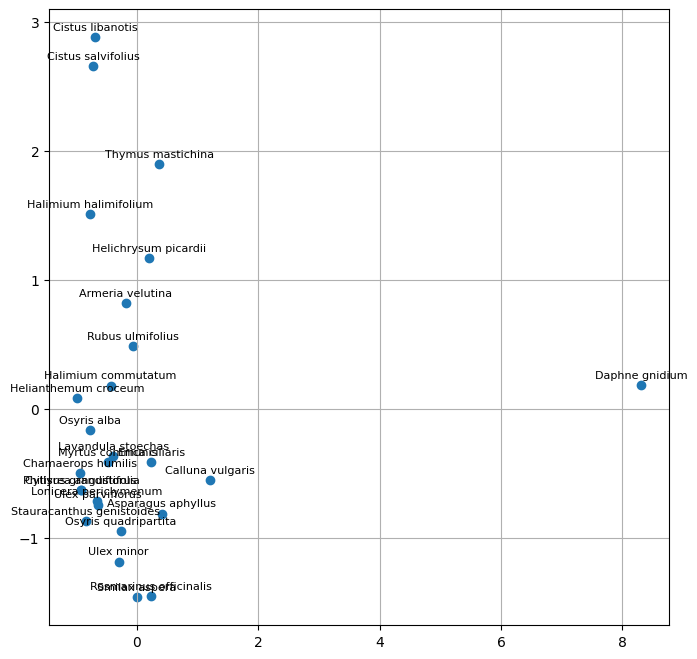

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents_plant = pca.fit_transform(insect_plant)
principalDfPlant = pd.DataFrame(data = principalComponents_plant
             , columns = ['principal component 1', 'principal component 2'] ,index = insect_plant.index)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(principalDfPlant['principal component 1'] , principalDfPlant['principal component 2'] )
for i, title in enumerate(insect_plant.index):
    ax.annotate(title, (principalDfPlant['principal component 1'][i], principalDfPlant['principal component 2'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

ax.grid()


if we look agien on the list of highst degree plant 

In [16]:
plant_sort.iloc[0:6]


,0,1
2,Daphne gnidium,86
25,Cistus libanotis,28
9,Cistus salvifolius,26
20,Calluna vulgaris,23
17,Thymus mastichina,22
7,Rosmarinus officinalis,21


We note that plants with a high degree are situated at the periphery of the PCA graph, consistent with the idea of nestedness. Specialists predominantly engage with generalist insects, while each generalist plant harbors distinct specialist insects specific to its interactions. Consequently, specialist species appear more clustered than generalists. This observation raises suspicions about the results involving Daphna gendium, as it is notably distant from other entities, suggesting a potential bias in the data. to see it more clearly I will color that represent node degree

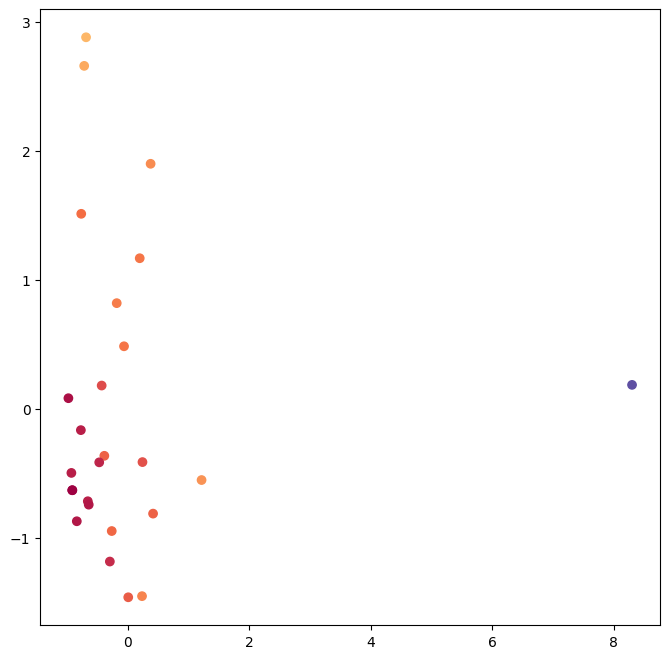

In [17]:
principalDfPlant['degree'] = 0
for index, row in principalDfPlant.iterrows():
    principalDfPlant.at[index, 'degree'] =plant_degree[index]
principalDfPlant

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(principalDfPlant['principal component 1'] , principalDfPlant['principal component 2'] ,c=principalDfPlant['degree'], cmap='Spectral', marker='o')
#ax.grid()



### princepel component analsys insect
Considering the recent conclusion, when examining the principal component analysis of insects, I will promptly generate a plot with colors corresponding to the node degree

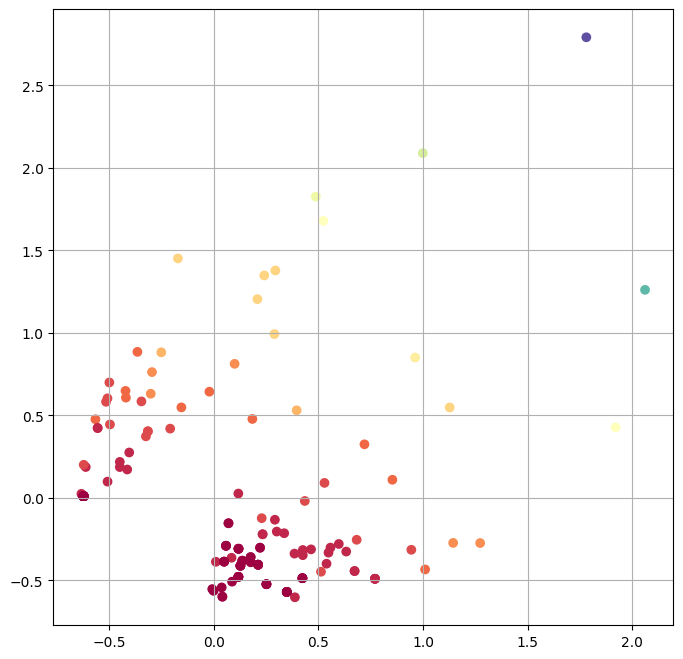

In [18]:
# Focal cell:

# Apply PCA transformation to the 'plant_insect' dataframe
principalComponents = pca.fit_transform(plant_insect)
principalDfInsect = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'], index=plant_insect.index)

# Create a new figure and subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# sdd node degree to the principalDf
principalDf_insect_with_degree = principalDfInsect.copy()
principalDfInsect['degree'] = 0
for index, row in principalDf_insect_with_degree.iterrows():
    principalDf_insect_with_degree.at[index, 'degree'] = plant_degree[index]

# Create a scatter plot
ax.scatter(principalDf_insect_with_degree['principal component 1'], principalDf_insect_with_degree['principal component 2'], c=principalDf_insect_with_degree['degree'], cmap='Spectral', marker='o')
ax.grid()


The observations in this context are quite fascinating. Clearly, two distinct and well-defined clustered groups are noticeable in the low-degree region, gradually converging in the high-degree area. This is intriguing because it suggests that, from an insect's perspective, the network exhibits both high modularity and high nestedness. This is positive news for the overall ecosystem, as networks with these characteristics tend to be more stable. Modularity can contain disruptions within specific modules, preventing them from impacting the entire network. Simultaneously, nestedness provides a level of adaptability and flexibility.

### domain knowlge moudulrity and nestedness in eco system
Modularity refers to the division of an ecosystem into distinct functional groups or modules. These modules often consist of species that interact more strongly with each other within their module than with species in other modules. This division allows for specialization and the efficient flow of energy and resources within the ecosystem.

Nestedness, on the other hand, describes the hierarchical organization of species interactions within an ecosystem. In a nested pattern, the interactions between species in one module are a subset of the interactions found in a larger, more inclusive module. This nested structure is believed to promote stability and resilience in ecosystems as it allows for redundancy and compensation in the face of disturbances.


## finding clusters 
Exploring the characteristics of each cluster could be meaningful, but to do so, I must first identify them. Upon examination, the higher cluster appears to resemble a straight line, while the lower one exhibits a geometrically elongated shape. Given these shapes, it seems that a Gaussian Mixture Model would be an appropriate method to effectively separate them.

In [19]:
gmm = GaussianMixture(n_components=2)
gmm.fit(principalDfInsect)

# Predict the cluster labels
labels = gmm.predict(principalDfInsect)


C:\anconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\anconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Now, let's plot the results to assess whether the algorithm provides favorable outcomes

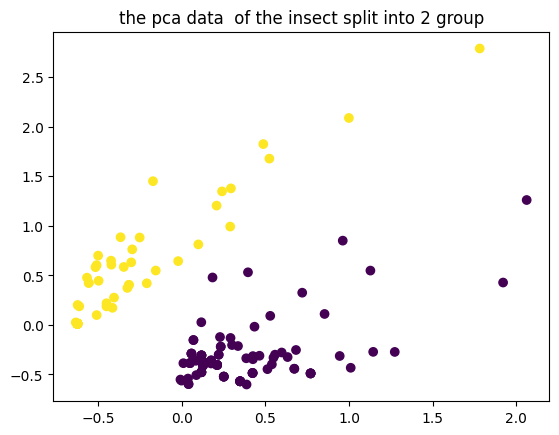

In [20]:

# Plot the data and cluster centers
plt.scatter(principalDf_insect_with_degree['principal component 1'] , principalDf_insect_with_degree['principal component 2'], c=labels, cmap='viridis')
plt.title('the pca data  of the insect split into 2 group')
plt.show()



It successfully identifies the information I intended it to find.

### Analyzing Clusters
To comprehend the significance of these clusters, it is logical to examine the insects within each of them that have a low node degree.

In [21]:
principalDf_insect_with_degree['Cluster'] = labels
cluster_0 = principalDf_insect_with_degree[principalDf_insect_with_degree['Cluster'] == 0]
cluster_1 = principalDf_insect_with_degree[principalDf_insect_with_degree['Cluster'] == 1]


low_degree_cluster_0 = cluster_0 [cluster_0['degree'] < 3]
low_degree_cluster_1 = cluster_1 [cluster_1['degree'] < 3]
low_degree_all = principalDf_insect_with_degree[principalDf_insect_with_degree['degree'] <3]
print(" in low_degree_cluster_0 there is " , len(low_degree_cluster_0) , "insect" ,"  and in low_degree_cluster_1 there is " , len(low_degree_cluster_1) , "insect")

 in low_degree_cluster_0 there is  78 insect   and in low_degree_cluster_1 there is  55 insect


There are too many values to manually identify patterns, and I lack an effective means to automatically retrieve data on their traits. However, there is a biological trick I can employ. In the field of biology, the names of insects consist of two words, where the first denotes the family name and the second signifies the specific species. By searching for families with few species in the dataset, I can determine if the clusters are linked to insect families. This approach allows me to gain insights into phylogenetic patterns. for that I create the next hellper function

In [22]:

def find_common_family(insects , min_count):
    """
    finds the insects family that have more then one spcie in the input
    
    Args:
        strings (List[str]): A list of strings containing insect name when the first word is the family name.
    """
    word_counts = {}
    common_family = {}
    for i in insects:
        # Split the string into two words
        words = i.split()
        
        # Check if there are at least two words in the string
        if len(words) >= 2:
            first_name = words[0]
            
            # Increment the count for the first name in the dictionary
            word_counts[first_name] = word_counts.get(first_name, 0) + 1
    
    # Print first names that occur more than twice
    for first_name, count in word_counts.items():
        if count >= min_count:
            common_family[first_name] = count
    return common_family


first I will serach for the insect familis that have more then one spcie with low degree in our dataset 

In [23]:
common_family = find_common_family(low_degree_all.index , 2)
print(common_family , "totlal amount of " , len(common_family.values()) , " famlies")

{'Andrena': 6, 'Anthaxia': 2, 'Anthophora': 3, 'Bembix': 2, 'Bombylius': 3, 'Cerceris': 2, 'Coleoptera': 6, 'Colletes': 2, 'Coptocephala': 2, 'Halictus': 4, 'Heliothis': 3, 'Lasioglossum': 4, 'Lathyrophthalmus': 2, 'Metachrostis': 2, 'Philanthus': 2, 'Pieris': 2, 'Psorosa': 2, 'Sphecodes': 2, 'Tapinoma': 2} totlal amount of  19  famlies


As observed, we have identified 19 insect families in our dataset that contain more than one insect species with a low node degree,when the range rise from 2 to 6. Now, we can examine how these families are distributed among the clusters.

In [24]:
# Find common families in the given indices
family_cluster_0 = find_common_family(low_degree_cluster_0.index, 1)
common_family_cluster_0 = common_family.keys() & family_cluster_0.keys()

family_cluster_1 = find_common_family(low_degree_cluster_1.index, 1)
common_family_cluster_1 = common_family.keys() & family_cluster_1.keys()

# Print common families in cluster 0
print("Cluster 0 holds species from the following common families:")
print(common_family_cluster_0)

# Print common families in cluster 1
print("Cluster 1 holds species from the following common families:")
print(common_family_cluster_1)

# Print shared species between cluster 0 and cluster 1
print("The shared species:")
print(common_family_cluster_0 & common_family_cluster_1)

Cluster 0 holds species from the following common families:
{'Colletes', 'Halictus', 'Cerceris', 'Bombylius', 'Lasioglossum', 'Tapinoma', 'Andrena', 'Coleoptera', 'Coptocephala', 'Philanthus', 'Sphecodes', 'Anthaxia', 'Anthophora'}
Cluster 1 holds species from the following common families:
{'Halictus', 'Bembix', 'Lasioglossum', 'Pieris', 'Metachrostis', 'Heliothis', 'Lathyrophthalmus', 'Psorosa'}
The shared species:
{'Halictus', 'Lasioglossum'}


To demonstrate a connection between the clusters and the species phylogenetic tree, we observe that out of the 19 common families, only 2 are shared between the clusters. This suggests that there may be a relationship between the clusters and the species phylogeny.

### moudoltiry test
In the last section, I observed from the PCA that the networks appear to be both nested and modular. I based this conclusion on the shape of the graph, although I acknowledge that this method is not entirely scientific. Unfortunately, testing for nestedness is highly complex and beyond the scope of this project. However, I can easily prove modularity. Modularity ranges from -1 to 1, and in a random network, it is mostly close to 0. To calculate modularity, I need to first identify communities within the network (groups that have more connections within themselves than with the rest of the network) and then measure the modularity level base on each community. 


In [25]:
communities = list(greedy_modularity_communities(network))
modularity = nx.community.modularity(network, communities)
print("Modularity:", modularity)


Modularity: 0.45506174003204825


moudulrity level that been found is much higher then what we will ecepct form random network, it worth mention that the network split to much more moudols then the pca of the insect to clusters let see how it look on the network itself 

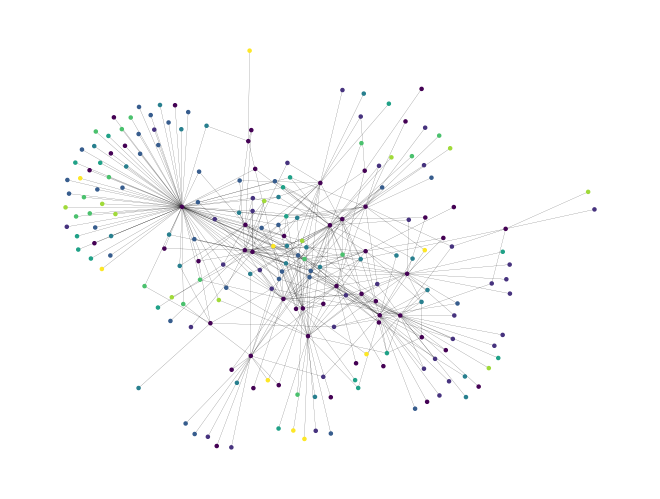

In [26]:
# Assign colors to nodes based on community
node_colors = [i for i, comm in enumerate(communities) for _ in comm]

# Draw the graph using a spring layout
pos = nx.spring_layout(network)
nx.draw(network, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.get_cmap("viridis") ,width = 0.1 , node_size =5.0)

# Show the plot
plt.show()

## conclusions
During the exploratory data analysis (EDA) stage, I identified several structural characteristics in my data and drew initial conclusions about the specific ecosystem. Notably, I observed a power-law distribution in the node degree, suggesting the involvement of coevolutionary processes in shaping the ecosystem's structure. This idea is further supported by the phylogenetic connections within clusters. Additionally, evidence from principal component analysis (PCA) indicates that the network exhibits both modularity and nestedness in the biological sense, indicating a high resilience to change. Collectively, these findings emphasize the well-structured nature of the networks, instilling confidence in my ability to perform link prediction based on the network structure. it is also worth mentioning that there might be bias in the data regarding dehpna gindium.


In [27]:
# Create the matrix
network = nx.from_pandas_adjacency(full_matrix)

# link prediction
Now, we move on to the central aspect of this project: link prediction. The primary objective of link prediction is to augment the observed network by forecasting links that are currently missing. Given the inherent challenge of not being aware of what we do not know, assessing methods through the prediction of entirely unknown links is unfeasible. Instead, we adopt a strategy where a portion of the links in the network is deliberately removed, and our algorithms attempt to reconstruct them. This approach differs from other types of learning because the removal of links impacts the network structure. In essence, allocating more links to the test set makes the task more challenging. In my specific case, I will randomly eliminate information about 15% of the link pairs (whether they have a link or not). The model is then trained on the remaining links. In many instances, I will also employ embedding sets, which constitute a subset of my links used to generate the features for prediction. This subset is divided into segments for training and prediction, with 25% of the training set allocated for embedding.

# Splitting Train and Test Data

When incorporating network data into my models, there are several essential considerations. Firstly, given that links function as both features and labels, it's crucial to handle them distinctively. They should be treated as pairs of vectors and labels during training, where vectors represent nodes, and labels indicate link presence. Moreover, they are still perceived as a network when used as features. Secondly, the data should be categorized into two groups for methods that do not utilize node embedding and three groups for those employing node embedding. Lastly, Highlighting the significance of recognizing that each method functions with its distinctive data structure, this added complexity has prompted me to devise two data classes. The first, showed in the following section of this notebook, facilitates data delivery for simpler models. The second, introduced later and called 'data_as_tensor,' is employed for deep learning. It encompasses intricate node embeddings, tensors, and batch learning. Nevertheless, it still relies on the training, embedding, and testing split that I established here.

In [28]:
class Data:
    def __init__(self ,plant , insect , network , metrix):
        # calculate the sample size as the number of possible pairs
        sample_size = plant.size * insect.size

        # create feature dataset
        X = np.array(np.meshgrid(plant, insect)).T.reshape(-1, 2)

        # create label dataset
        Y = np.zeros(sample_size)
        for i in range(sample_size):
            Y[i] = network.has_edge(X[i][0], X[i][1])
        
        # split X and Y into train and test sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
        
        y_train_train, y_train_embed, x_train_train, x_train_embed = train_test_split(self.y_train, self.x_train, test_size=0.75, random_state=42)
        
        # as link prediction is a self suprivsed task if I use machine learning it will need split totrain and embding
        self.y_train_train, self.y_train_embed, self.x_train_train, self.x_train_embed = train_test_split(self.y_train, self.x_train, test_size=0.5, random_state=42)

        self.network = network
        self.metrix = metrix
    
    
    # create a training network without the edge of the testing dataset (for train test separation)
    def train_network(self):
        net_train = self.network.copy()
        for x in self.x_test:
            if self.network.has_edge(x[0], x[1]):
                net_train.remove_edge(x[0], x[1])
        return net_train
    
    # create a emabding network without the edge of the training dataset (for train embeding separation)
    def embading_and_train_network(self):
        net_train = self.train_network()
        for x in self.x_train_train:
            if network.has_edge(x[0], x[1]):
                net_train.remove_edge(x[0], x[1])
        return net_train


    # create a training network in metrix reprstion without the edge of the testing dataset (for train test separation)
    def train_metrix(self):
        train_matrix = full_matrix.copy()
        for x in self.x_test:
            train_matrix[x[0]][x[1]] = 0
            train_matrix[x[1]][x[0]] = 0
        return train_matrix
    def embading_and_train_metrix(self):
        train_matrix = self.train_metrix()
        for x in self.x_train_train:
            train_matrix[x[0]][x[1]] = 0
            train_matrix[x[1]][x[0]] = 0
        return train_matrix
    

In [29]:
data = Data(plant , insect , network , full_matrix)

# stocsthic block model
Before delving into machine learning techniques, I aim to explore a more traditional approach that bridges the gap between link prediction and exploratory data analysis (EDA). This approach is known as Stochastic Block Model (SBM), a statistical model designed for analyzing relationships within a network. In SBM, nodes are grouped or partitioned, providing valuable insights into the probability of a link between nodes based on their group membership. While SBM can be utilized for link prediction, its primary focus is understanding the overall graph structure. Nonetheless, I am intrigued to observe how much information about link existence we can derive simply by partitioning nodes into groups. This exploration serves as a useful benchmark for comparison with machine learning methods and offers insights into the inherent group structures within the data.

In [30]:

%%capture
# Create SBM model
model_selection = ModelSelection("SBM")
# Fit SBM model

models = model_selection.fit(coo_matrix(data.train_metrix()), symmetric=True);


Spliting
	 Explores models from 1 classes
	 Explores models from 2 classes
	 Explores models from 3 classes
	 Explores models from 4 classes
	 Explores models from 5 classes
	 Explores models from 6 classes
	 Explores models from 7 classes
	 Explores models from 8 classes
Merging
	 Explores models from 9 classes
	 Explores models from 8 classes
	 Explores models from 7 classes
	 Explores models from 6 classes
	 Explores models from 5 classes
	 Explores models from 4 classes
Best icl is -1176.1680
Spliting
	 Explores models from 3 classes
	 Explores models from 4 classes
	 Explores models from 5 classes
	 Already explored models from 6 classes
	 Explores models from 7 classes
Merging
	 Already explored models from 8 classes
	 Already explored models from 7 classes
	 Already explored models from 6 classes
	 Already explored models from 5 classes
	 Already explored models from 4 classes
	 Explores models from 3 classes
Best icl is -1176.1680
Spliting
	 Explores models from 2 classes
	 Alr

to learn anything from the split I need to pose wvry group in diffrent area of the grpah and see what the alghorithm find 

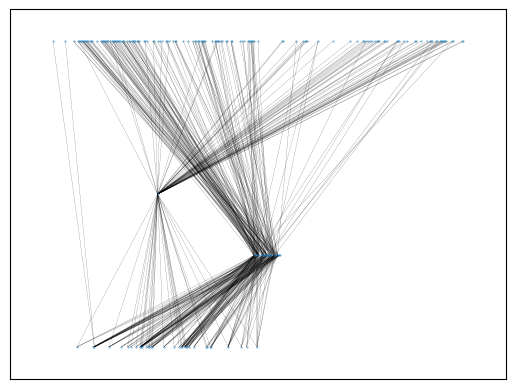

In [31]:
# give every node position based on its sbm group
def position(i: int, group: int) -> tuple:
    if group == 0:
        return (i + 100, 50)
    elif group == 1:
        return (i, 0)
    elif group == 2:
        return (i, 100)
    elif group == 3:
        return (i + 200, 30)
    elif group == 4:
        return (i + 200, 100)
    else:
        return 10, 10
    

# Initialize an empty dictionary to store node positions
pos = {}


# Iterate over each node in the network and Assign the position of the node
i = 0
for node in data.network.nodes():
    pos[node] = position(i, models.best.labels[i])
    i += 1
    
nx.draw_networkx(network,with_labels=False, pos = pos, width = 0.1 , node_size =0.1)


Fascinatingly, it divides the nodes into two groups of insects (above and below) and two groups of plants (in the middle). Predictably, 'Daphna gendium' obtains its own group, distinct from the other plants in one separate group, aligning well with the absence of clear clustering in the PCA of the plant. The division of insects into two groups may potentially be associated with the clusters we have previously observed.

### SBM as link predictor
Now that we have identified the patterns that the SBM discovers in the training data, let's evaluate its performance in predicting the test data

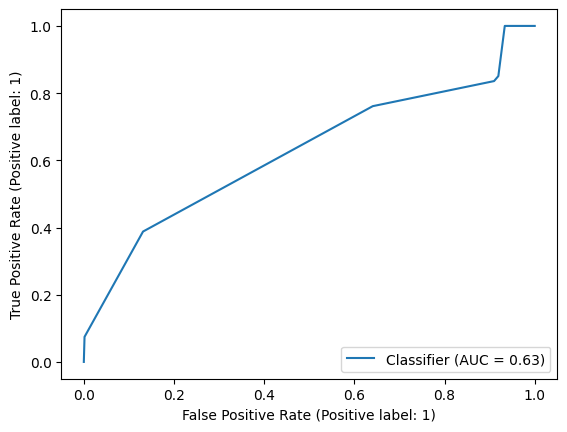

In [32]:
def group(name):
    ind = np.array(network.nodes())
    return models.best.labels[np.where(ind == name)[0][0]]
# Define probability table
probability_table = models._best.group_connection_probabilities

# calculate prediction table
y_pred = np.zeros(data.y_test.size)
for i in range(data.y_test.size):
    # Assign probability value to y_pred[i] 
    y_pred[i] = probability_table[group(data.x_test[i][0]), group(data.x_test[i][1])]

# Display ROC curve 
RocCurveDisplay.from_predictions(data.y_test, y_pred)


unsuprisingly it dosent prform very well still it work better then random

# feature extraction and calssic machine learning
In the context of link prediction, which inherently involves self-supervised learning, traditional supervised algorithms like MLP, random forest, or SVM aren't directly applicable. However, by embedding the structural data of the network into node-specific properties for use as features, we can leverage supervised learning. To systematically explore different feature extraction methods, I will create a function that consistently tests each method with the same machine learning algorithm. This experimentation will involve various feature extraction techniques, coupled with machine learning methods. Additionally, I will investigate node embedding using Node2Vec, principal component analysis, and heuristic methods. The objective is to evaluate their performance systematically, generate ROC curve metrics, and provide confusion matrices for analysis. 

In [33]:
print(data.y_train_train)

[0. 0. 1. ... 0. 0. 0.]


In [34]:

def test_simple_ML(x_train, y_train, x_test, y_test):
    """
    This function trains multiple classifiers (SVC, RandomForestClassifier, MLPClassifier)
    on the provided training data (x_train, y_train), and plots the ROC curve for each classifier
    using the test data (x_test, y_test).
    It also prints the confusion matrix for the classifier with the best AUC score.
    """
    
    # Resample the training data to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

    # Create the classifiers
    svc = svm.SVC(probability=True).fit(X_resampled, y_resampled)
    rfc = RandomForestClassifier(max_depth=3, random_state=0).fit(X_resampled, y_resampled)
    mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(40)).fit(X_resampled, y_resampled)
    classifiers = {'SVC': svc, 'RandomForest': rfc, 'MLP': mlp}
    
    best_auc = 0
    best_clf = None
    
    # Evaluate classifiers and find the best one based on AUC score
    for clf_name, clf in classifiers.items():
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(x_test)[:, 1]
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(x_test)
        else:
            raise ValueError("Classifier does not support probability or decision_function.")
        
        auc = roc_auc_score(y_test, y_score)
        
        if auc > best_auc:
            best_auc = auc
            best_clf = clf_name

    # Create the ROC curve plot
    ax = plt.gca()
    RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=ax, alpha=0.8)
    RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
    RocCurveDisplay.from_estimator(mlp, x_test, y_test, ax=ax, alpha=0.8)
    
    # Plot the confusion matrix of the best classifier
    if best_clf:
        best_classifier = classifiers[best_clf]
        y_pred = best_classifier.predict(x_test)
        matrix = confusion_matrix(y_test, y_pred)
        
        # Plot the confusion matrix
        plt.figure(figsize=(4, 3))
        sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Link', 'Link'], yticklabels=['No Link', 'Link'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {best_clf}')
        plt.show()
    
    # Show the plots
    plt.show()

## node emading with node2vec
Node embedding involves the transformation of structural characteristics inherent in a network into node properties. Among the prominent algorithms for this task, Node2Vec stands out as an excellent choice. Its efficacy lies in its ability to embed neighboring nodes in close proximity while concurrently preserving the structural roles of each node. Essentially, Node2Vec extends the principles of the Word2Vec algorithm to the domain of network data. By seamlessly encapsulating the relationships between adjacent nodes and effectively mapping their structural roles, Node2Vec emerges as a powerful tool for capturing the nuanced features of complex network structures.

Computing transition probabilities:   0%|          | 0/205 [00:00<?, ?it/s]

C:\anconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


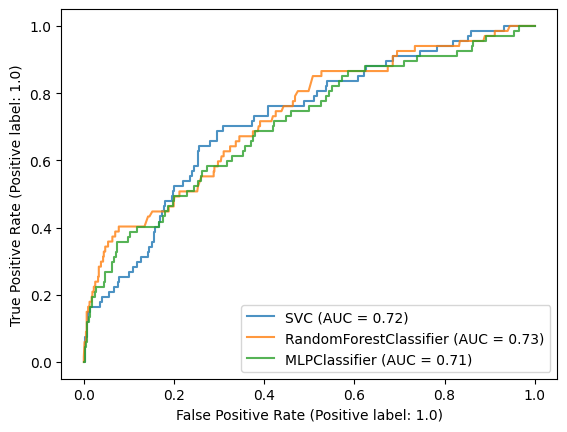

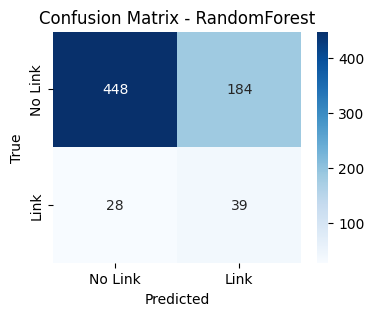

In [35]:
# Splitting the train dataset into train and embed datasets
net_train = data.embading_and_train_network()

# Generating node2vec embeddings
node2vec = Node2Vec(net_train, dimensions=20, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=3, min_count=1)

# Generating embeddings for train and test datasets
x_train_em = [np.append(model.wv.get_vector(str(x[0])), model.wv.get_vector(str(x[1]))) for x in data.x_train_train]
x_test_em = [np.append(model.wv.get_vector(str(x[0])), model.wv.get_vector(str(x[1]))) for x in data.x_test]
test_simple_ML( x_train_em ,data.y_train_train , x_test_em ,  data.y_test)

Combining node2vec with various machine learning algorithms leads to significantly enhanced outcomes compared to stochastic block modeling, with random forest emerging as the top performer. The confusion matrix exposes an interesting observation: the model predicts a notably higher number of links than actually exist. This phenomenon can be attributed to the resampling technique employed for data balancing. Nevertheless, the model faces more challenges in predicting links (38 out of 67) than in predicting no links (487 out of 632). I will delve into a more detailed discussion of this phenomenon at the conclusion of this section.Combining node2vec with various machine learning algorithms leads to significantly enhanced outcomes compared to stochastic block modeling, with random forest emerging as the top performer. The confusion matrix exposes an interesting observation: the model predicts a notably higher number of links than actually exist. This phenomenon can be attributed to the resampling technique employed for data balancing. Nevertheless, the model faces more challenges in predicting links (39 out of 67) than in predicting no links (487 out of 632). 


### Principal Component Analysis
Node2vec is a domain-specific algorithm tailored for network analysis. It is intriguing to draw a comparison between node2vec and the more general algorithm, Principal Component Analysis (PCA), which finds applications in various data science tasks. The article "A roadmap towards predicting species interaction networks (across space and time)" from 2021 suggests that machine learning based on PCA performs well in predicting links in pollination networks. This prompts an exploration of how these two algorithms fare against each other in the context of network analysis.

C:\anconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


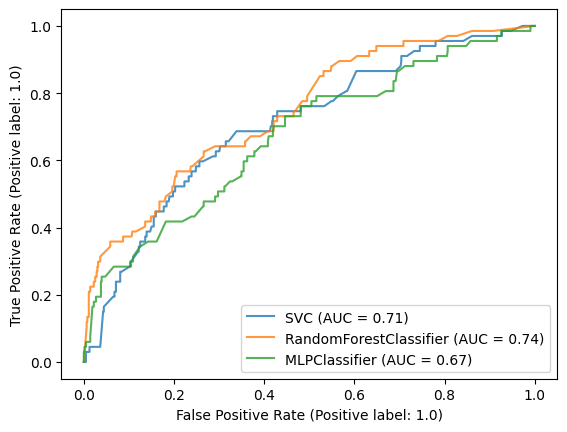

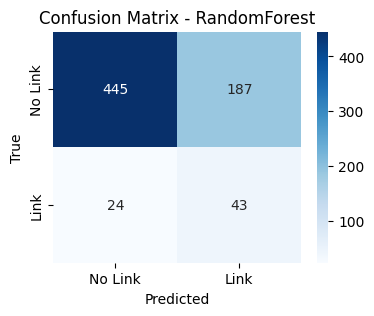

In [36]:
pca = PCA(n_components=20)
insect_train_data = data.embading_and_train_metrix().loc[insect, plant]
plant_train_data = data.embading_and_train_metrix().loc[plant, insect]

pca_insect = pca.fit_transform(insect_train_data)
pca_plant = pca.fit_transform(plant_train_data)
principalDf_plant = pd.DataFrame(data = pca_plant ,index = insect_plant.index)
principalDf_insect = pd.DataFrame(data = pca_insect ,index = plant_insect.index)
pca_df =pd.concat([principalDf_plant,principalDf_insect])

x_train_pca = [np.append(pca_df.loc[str(x[0])],pca_df.loc[str(x[1])]) for x in data.x_train_train]
x_test_pca = [np.append(pca_df.loc[str(x[0])],pca_df.loc[str(x[1])]) for x in data.x_test]
test_simple_ML( x_train_pca ,data.y_train_train , x_test_pca ,  data.y_test)

Overall, when examining the AUC values, PCA performs slightly worse than node2vec. However, it excels in the more challenging task of true positives, achieving 43 out of 67. Random forest stands out as the best-performing machine learning model. It is surprising to note that a ge"neral algorithm performs as well as a domain-specific one.

### Heuristic Method

In our exploration of feature extraction methods, the heuristic approach emerges as a valuable technique. This method involves extracting specific features known from experience to be effective for link prediction, and it finds wide application in various industries, including social networks.

Several features within the network structure are recognized for their significance in link prediction. While common neighbors are a common metric, other considerations include the node degree of both nodes and the shortest path. In bipartite networks, where the common neighbor count is invariably 0 for potential edge pairs of nodes, we overcome this limitation by employing the count square.In our exploration of feature extraction methods, the heuristic approach emerges as a valuable technique. This method involves extracting specific features known from experience to be effective for link prediction, and it finds wide application in various industries, including social networks.

Several features within the network structure are recognized for their significance in link prediction. While common neighbors are a common metric, other considerations include the node degree of both nodes and the shortest path. In bipartite networks, where the common neighbor count is invariably 0 for potential edge pairs of nodes, we overcome this limitation by employing the count square. to use I will first creat method for feature extraction

In [37]:
def count_square(network: nx.Graph, source: int, target: int) -> int:
    '''
    Counts the number of edges between the neighbors of the source and target nodes in a network.
    '''
    count = 0 
    for s in nx.neighbors(network, source):
        for t in nx.neighbors(network, target):
            if network.has_edge(s, t):
                count += 1
    return count
def create_feature(nodes: np.ndarray, feat_array: np.ndarray , net_train :nx.Graph, ) -> np.ndarray:
    """
    Creates features based on the given nodes pair and updates the feature array accordingly.
    
    Parameters:
    nodes (np.ndarray): The nodes array.
    feat_array (np.ndarray): The feature array.
    
    Returns:
    np.ndarray: The updated feature array.
    """
    for i in range(int(nodes.size/2)):
        edge = False
        source = nodes[i][0]
        target = nodes[i][1]
        
        # Remove current edge
        if net_train.has_edge(source, target):
            net_train.remove_edge(source, target)
            edge = True
        
        # Add node degrees
        feat_array[i][0] = net_train.degree[source]
        feat_array[i][1] = net_train.degree[target]
        
        # Add shortest path distance
        if nx.has_path(net_train, source=source, target=target):
            feat_array[i][2] = nx.shortest_path_length(net_train, source, target) 
        else:
            feat_array[i][2] = 20
        
        # Count squares
        feat_array[i][3] = count_square(net_train, source, target)
        
        # Return current node
        if edge:
            net_train.add_edge(source, target  , weight =1.0) 
    
    return feat_array

and now I can use them and test how good it preform 

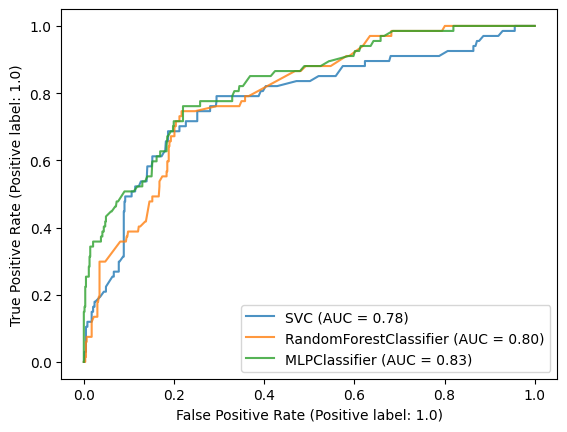

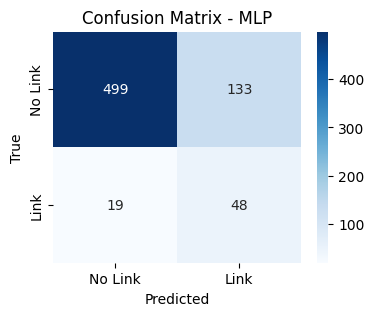

In [38]:
feature_num = 4

# Calculate the shape of the train and test arrays
shape_train = (data.y_train.size, feature_num)
shape_test = (data.y_test.size, feature_num)

# Create feature arrays
x_train_feat = np.zeros(shape_train)
x_test_feat = np.zeros(shape_test)

x_train_feat = create_feature(data.x_train, x_train_feat , data.train_network())
x_test_feat = create_feature(data.x_test, x_test_feat , data.train_network())
test_simple_ML( x_train_feat ,data.y_train , x_test_feat ,  data.y_test)


As evident, the heuristic method yields superior results compared to node embedding, with MLP delivering the optimal outcome in both overall performance (AUC = 0.83), true positives (48 out of 67), and true negatives (499 out of 632). While this aligns with the widespread use of the heuristic method, it's noteworthy that only four simple features were utilized, underscoring the remarkable nature of these results.

One possible avenue to explore from these findings could involve seeking additional effective heuristics beyond those already employed. However, this approach is constrained by personal creativity in devising useful heuristics. A potentially more promising direction involves the development of a deep learning method that find himself and use heuristics – an approach known as an autoencoder. Ensuring that the autoencoder can generate attributes like polygon count, which are known to be important, has proven to be a significant challenge. A groundbreaking algorithm named SEAL, belonging to the GNN (Graph Neural Network) category within deep learning, has recently emerged to address this challenge. However, implementing SEAL has posed a considerable personal challenge and has been a major focus throughout my work on this project. Despite extensive efforts, achieving truly good results remains elusive.

# Graph Neural Networks (GNN)

Graph Neural Networks (GNN)
The conventional neural network approach entails a clear separation between the network's structure, meticulously crafted by the programmer, and the weights of the links, derived from data through learning. Graph Neural Networks (GNNs) challenge this paradigm by incorporating the data, represented as the graph itself, as an integral part of the network structure. Utilizing GNNs for link prediction extends the concept of self-supervised learning, as we feed features extracted from links through a network structured by these links to predict new links. Naturally, this approach demands extra attention to prevent the inadvertent mixing of test and train data, a pitfall that, I confess, led to a few days of setbacks in my work.

## The SEAL Algorithm
Addressing the challenge of efficient link prediction using Graph Neural Networks (GNN) had remained unresolved for many years. In the groundbreaking paper "Link Prediction Based on Graph Neural Networks" by Muhan Zhang and Yixin Chen in 2018, they introduced the SEAL algorithm. founded on a profound mathematical comprehension of heuristics broadly employed in link prediction.

The SEAL algorithm is structured into four key stages:

1. Subgraph Extraction:
    In GNN, the complexity of the model and its computational efficiency are influenced by the size of the network. In scenarios with massive graphs containing billions of nodes and links, such as social networks or commercial networks, SEAL introduces subgraph extraction. In each run of the model, it focuses solely on the neighborhood of the nodes for which link prediction is desired. While experimenting with a scaled-down version of SEAL, I omitted this stage and simplified others to align the model's complexity with the available data. This attempt, albeit risky, aimed to adapt an algorithm designed for large networks to smaller ones.

2. Node Labeling:
    Unlike previous algorithms, SEAL differs in node labeling. Instead of utilizing features solely for nodes involved in link then we pedict now, it considers every node in the network based on its role concerning the links being predicted.

3. Message Passing Layers:
    The core of the GNN concept lies in message passing layers, which are neural network layers that shaped by the input network's structure.

4. Convolutional Network and MLP Layers:
    SEAL incorporates convolutional network and Multi-Layer Perceptron (MLP) layers, contributing to its overall architecture.

While the theoretical underpinnings of SEAL are fascinating, delving into them exceeds the scope of this project. For those eager to explore further, I recommend the article  [SEAL Link Prediction Explained](https://towardsdatascience.com/seal-link-prediction-explained-6237919fe575).


## preapring the data - node labling
The process of labeling nodes entails generating features for each node in the network to elucidate its role in relation to the two nodes targeted for link prediction, namely the source node and the target node. A proficient node labeling algorithm accomplishes this by initially assigning unique labels to these relevant nodes. Following that, labels are allocated to all other nodes based on their cumulative distances from both the source and target nodes. I implemented the DLRN algorithm, which adheres to the following rule:

$$
DLRN(a, \text{source}, \text{target}) = DLRN(b, \text{source}, \text{target})
$$
if and only if
$$
\left((\text{dis}(a, \text{source}) = \text{dis}(b, \text{source}) \text{ and } \text{dis}(a, \text{target}) = \text{dis}(b, \text{target})) \text{ or } (\text{dis}(a, \text{source}) = \text{dis}(b, \text{target}) \text{ and } \text{dis}(a, \text{target}) = \text{dis}(b, \text{source}))\right)
$$

Utilizing the formula:

$$
DLRN(node_x , node_{source}  , node_{target}) = 1 + \min(dis(node_x, node_{source} ) ,  dis (node_x, node_{target}) ) ) + \left(\frac{d}{2}\right)\left[\left(\frac{d}{2}\right) + (d\%2) − 1\right]
$$

where $\text{dis}$ is the distance function and $$ d = dis(node_x, node_{target}) + dis(node_x, node_{target})$$.

For a deeper understanding of the theory behind this algorithm, I recommend consulting this source.




[Labeling Trick: A Theory of Using Graph Neural Networks for Multi-Node Representation Learning](https://arxiv.org/abs/2010.16103)



In [39]:
def node_labeling(network: nx.Graph, source: int, target: int):
    """
    Label the nodes based on dlrn.

    Args:
        network: The graph network.
        source: The source node.
        target: The target node.

    Returns:
        A dictionary with node labels.
    """
    label = {}

    for node in np.array(network.nodes):

        # The label of the node and the target is 1
        if node == source or node == target:
            label[node] = 1

        # If the node is disconnected with one of the target nodes, it gets the value 40 which is higher than every other result
        elif not nx.has_path(network, node, source) or not nx.has_path(network, node, target):
            label[node] = 40

        # For most of the nodes, calculate labeling based on dlrn
        else:
            Dx = len(nx.shortest_path(network, node, source))
            Dy = len(nx.shortest_path(network, node, target))
            d = Dx + Dy
            label[node] = 1 + min(Dx, Dy) + (d / 2) * (d / 2 + d % 2 - 1)

    return label

for any pair try to prdict the labling thacniqe should appley to every node in the graph I will to by creating a new graph with the features. in this opeertuinity I will also format in from networkX thp pyg_grpah with is the current data structure for GNN with torch library

In [40]:
def graph_for_pair(network, source, target):

    # Convert to torch_geometric graph
    pyg_graph = from_networkx(data.embading_and_train_network())
    
    # Add node feature
    x = list(node_labeling(data.embading_and_train_network(), source, target).values())
    
    for i in range(len(x)):
        x[i] = [x[i]]  # After experiments, return a instead of edge
    x = torch.FloatTensor(x)
    pyg_graph.x = x
    
    return pyg_graph

## data loader
To handle data in the context of the Graph Neural Network (GNN), a specialized data class is required to accommodate the complexities of this new mission. The data loader I'm creating serves the following purposes:

- Generating unique full graphs for any given pair with fearutre create by the DLRN.
- Ensuring a balanced distribution of the data.
- Formatting the feature vectors into tensors, a data type commonly utilized in deep learning that incorporates the gradient function.
- Creating batches for efficient batch learning.
- Establishing communication with the Lightning library, which streamlines and accelerates the development of deep learning models.
To achieve these objectives, I'm designing a data loader that inherits from the Lightning library, providing integration of these essential functionalities into the GNN workflow.

In [41]:
batch_size = 32
from torch.utils.data.sampler import WeightedRandomSampler

class Data_as_tensors(L.LightningDataModule):
    def __init__(self, data):
        super().__init__()

 
        # Calculate features 
        X_train_feat = [graph_for_pair(data.embading_and_train_network(), x[0], x[1]).x.numpy() for x in data.x_train_train] 
        X_test_feat = [graph_for_pair(data.train_network(), x[0], x[1]).x.numpy() for x in data.x_test]
        
        # Making over and under sampling to balance the  train dataset
        chose_zero = sum(data.y_train_train) / data.y_train_train.size 
        chose_one = (data.y_train_train.size - sum(data.y_train_train)) / data.y_train_train.size 
        prob = []
        
        for y in data.y_train_train:
            if y.item() == 0:
                prob.append(chose_zero)
            else:
                prob.append(chose_one)
        
        self.prob = torch.tensor(prob)
        
        
        # Create data set
        self.train_data = TensorDataset(torch.tensor(X_train_feat).type(torch.float32), torch.tensor(data.y_train_train).type(torch.float32))
    
        self.test_data = TensorDataset(torch.tensor(X_test_feat).type(torch.float32), torch.tensor(data.y_test).type(torch.float32))
    
        #split validtion data
        self.test_data, self.valid_data = random_split(self.test_data, [int(0.75 * len(self.test_data)), len(self.test_data) - int(0.75 * len(self.test_data))])
       
    def train_dataloader(self):
        sampler = WeightedRandomSampler(weights=self.prob, replacement=True, num_samples=len(self.prob))
        return DataLoader(self.train_data, batch_size=batch_size, sampler=sampler,num_workers = 8)
    
    def validate_dataloader(self):
        return DataLoader(self.valid_data, batch_size=batch_size,num_workers = 8)    

    
    def test_dataloader(self):
        return DataLoader(self.test_data, batch_size=batch_size,num_workers = 8 , shuffle=True)


In [42]:
data = Data(plant , insect , network , full_matrix)
data_tensor = Data_as_tensors(data)


C:\Users\יובל\AppData\Local\Temp\ipykernel_15268\1167608020.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  self.train_data = TensorDataset(torch.tensor(X_train_feat).type(torch.float32), torch.tensor(data.y_train_train).type(torch.float32))


# Model Initialization

The model initialization involves configuring parameters for each layer, covering four distinct types:

- **GCNconv Layer:** This layer functions as a message-passing component based on aggregation. Each node essentially aggregates the features of all its neighbors to update its own features. Each layer in this category has a single parameter influencing the weight of the impact of neighboring nodes on each node.

- **SortAggregation Layer:** This non-learning layer is used for sorting nodes based on WL graph coloring. Its significance lies in the fact that while the order of nodes doesn't matter for GCNconv, after processing, the list becomes a singular, elongated feature vector that needs meaningful organization.

- **Conv1d Layer:** Despite being originally designed for image recognition, this one-dimensional convolutional neural network (CNN) has proven highly valuable as a component of the GNN.

- **MLP Layer:** This layer synthesizes all the information into a classification.

- **Non-linearity Method:** For non-linearity, I chose leaky relu because when I used relu, I encountered problems of dying gradient.

From an autoencoder perspective, it can be said that GCNconv and SortAggregation layers generate relevant features, while Conv1d and MLP layers utilize these features to create a classification.

In addition to initializing the layers, I set up a few parameters aimed at monitoring the learning process and tracking its progression.


In [43]:
class Model(L.LightningModule):
    def __init__(self ,Mata_paramter,network ) :
        super().__init__() 
        
        self.network = network
        self.graph = from_networkx(network)

  
        #initilize parmaters for aggregtion layers (GCNConv)
        self.convs = ModuleList()
        self.convs.append(GCNConv(Mata_paramter['aggrgtion_layers']['input_size'], Mata_paramter['aggrgtion_layers']['hidden_layer_size']))
        for i in range(0, Mata_paramter['aggrgtion_layers']['num_of_hidden_layer'] - 1):
            self.convs.append(GCNConv(Mata_paramter['aggrgtion_layers']['hidden_layer_size'], Mata_paramter['aggrgtion_layers']['hidden_layer_size']))
        self.convs.append(GCNConv(Mata_paramter['aggrgtion_layers']['hidden_layer_size'], 1))
        

        #initilize parmters fo sortin layer
        self.pool = SortAggregation(Mata_paramter['aggrgtion_layers']['k'])

        #convolotinal layers
        self.conv1 = Conv1d(1, Mata_paramter['conv_layer']['output_size_1'] , Mata_paramter['conv_layer']['karnal_size'] , Mata_paramter['conv_layer']['karnal_size'] ,bias=False) 
        self.maxpool1d = MaxPool1d(2, 2)
        self.conv2 = Conv1d(Mata_paramter['conv_layer']['output_size_1'], Mata_paramter['conv_layer']['output_size_2'],
                            Mata_paramter['conv_layer']['karnal_size'], 1 , bias = False)


        #initilaiz parmters to fully connected layers
        self.fc1 = nn.Linear(47, 5  )

        self.fc2 = nn.Linear(5, 1)
        self.S = nn.Sigmoid()
        self.LR = nn.LeakyReLU(0.01)

         

        #monitoring paramters
        self.loss =  nn.BCEWithLogitsLoss()
        self.epoch_loss =0
        self.learning_rate = 0.01
        self.last_epoch_lost =1
        self.allready_count =False
        self.sample_num = 0
        self.batch_size =1
        
        #in dev mode te model print during the trianing the loss and the improvment at the end of every epoch
        self.dev_mode = False



## Model Architecture

The `forward` method outlines the flow of information through our model, initiating with the GCNConv layers. These layers generate new vectors at each step, holding the outcomes after each layer. The vectors are then sorted, and the most important features are selected in the SortAggregation layer. These features are combined into a single elongated vector, which subsequently traverses through two layers of one-dimensional CNN with max pooling between them. The final output then passes through the two MLP layers, producing a single number between 0 and 1 that determines whether a link exists or not.


In [44]:
def forward(self  ,x ,test =True ):
        

        '''
        the GCNConv layers base on the idea massage passing when in each layers each node in the network
        "send a massage" that tell what his value now and then aggrgate,
        in this case by adding all the massage that he get from his nigbher
        '''
        #the GCNConv layers
        
        xs = [x]
        for conv in self.convs:
            xs += [conv(xs[-1], self.graph.edge_index)]
        x = torch.cat(xs[1:], dim=-1)
         
            
        
            
        '''
         it that satge our data are list of nodes and they feature, the order where the node are present is meaningles
         that of course is a major concern if we want to use convlotional layers on it so we use SortAggregation to sort the node 
         by WL coloring algorithem and also save only the k most importent of them
        '''

        if len(x.shape) ==3:   #batch learning
            x = [self.pool(batch) for batch in x]
            x = torch.cat(x, axis=0)
        else:      #single smaple
                x = self.pool(x)

        '''
            the 1d convolional layers extract the importent network feature out of the node feature that we aggrigate
        '''
        x = x.unsqueeze(1)  
        x = self.LR(self.conv1(x))
        x = self.maxpool1d(x)
        x = self.LR(self.conv2(x))
       


        '''
        we ending with 3 fully connected layers to add every thing for a final answer
        '''

        x =torch.flatten(x, start_dim=1)
        x = self.LR(self.fc1(x))
        x = self.fc2(x)
        if test:
            return self.S(x)
        return x 


Model.forward = forward

## Configure Optimizers
In the configure_optimizers method, I employ the widely-used Adam optimizer as the algorithm for the model's learning process. Additionally, I specify a mechanism to reduce the learning rate in the absence of improvement. This enables the model to fine-tune parameters for enhanced accuracy. The determination of the rate of decrease and the patience of the scheduler is made through a trial-and-error process, searching for the parameters that yield the best results.

In [45]:
def configure_optimizers(self): # this configures the optimizer we want to use for backpropagation.
    print('configure_optimizers')
    optimizer =  torch.optim.Adam(self.parameters(), lr=self.learning_rate ) # NOTE: We set the learning rate (lr) to our new variable
    lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)
    return {
        "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": lr_scheduler,
                "monitor": "train_loss",

        }}
Model.configure_optimizers =configure_optimizers   

### training step
The training step method is tasked with determining the model's loss during the training period when provided with a batch of training examples. Additionally, it generates a chronological log of the loss to facilitate the development process.
For the loss function, I have selected logits, a common and widely-used choice in binary classification. 

In [46]:

def training_step(self, train_batch, batch_idx):
    x, y = train_batch
        
    # saving data abuat the size of the input
    self.batch_size  = x.shape[0]
    if not self.allready_count:
        self.sample_num += x.shape[0]
        
    #calculate prediction
    logits = self.forward(x ,test = False)

    #calculate loss
    loss = self.loss(logits.view(y.shape),y)
    self.log('train_loss', loss, on_step=True, prog_bar=True)

    self.epoch_loss+= loss
    return loss
Model.training_step =training_step   

## Development Mode

While actively working on refining the model and experimenting with various structures and meta-parameters, it's essential to closely monitor the model's progress in real-time. However, displaying progress information with every model run can be overwhelming. To address this, I introduced the `dev_mode` parameter along with the `on_train_epoch_end` function.

By setting `dev_mode` to true, the `on_train_epoch_end` function becomes active, allowing it to print the model's progress at the conclusion of each epoch. This approach provides a balance between the need for continuous progress tracking during development and the desire to avoid excessive output with every model run.

In [47]:

def on_train_epoch_end(self):
    self.allready_count =True
    self.epoch_loss = (self.epoch_loss.item() * self.batch_size)/self.sample_num 
    self.log('epoch_train_loss', self.epoch_loss, on_epoch=True, prog_bar=True)
    improvment = (self.last_epoch_lost  - self.epoch_loss)*100 / max(self.last_epoch_lost  , self.epoch_loss)
        
    #while I am working on the model it comfort to see preformence durnig run time still I dont it to print it every tine I use the model
    if self.dev_mode:
        print('loss = ' ,self.epoch_loss )
        print('improvment = ',improvment ,'%')
    self.last_epoch_lost = self.epoch_loss
    self.epoch_loss =0
Model.on_train_epoch_end =on_train_epoch_end   

#### meta paramter 
While working, I've discovered that it is convenient to place some of the meta-parameters outside of the model and deliver them as input.

In [48]:
Mata_paramter = {
    'aggrgtion_layers': {
        'input_size': 1,
        'hidden_layer_size': 1,
        'num_of_hidden_layer': 3,
        'k': 100
    },
    'conv_layer': {
        'output_size_1': 1,
        'karnal_size': 4,  # hidden_layer_size * num_of_hidden_layer + 1
        'output_size_2': 1
    }
}


## unstable preformence 
trough my work on devlpoing the GNN that the models that I trainsd veried very much in thir proformence so to explore it prefomence I need to train it many models compre them and compre to my erlier result with other method. for that I need a numric way to compare as roc curve is very good when you compre to method its less comfort when to compre many models. so for that I will use balanced_accuracy_score

In [49]:
from sklearn.metrics import balanced_accuracy_score


def calc_accuracy(model, data_loader):

    pred = []
    labels = []
    
    for batch in data_loader:
        X, Y = batch
        for i in range(X.size(0)):
            if model(X[i]).item() > 0.5:
                pred.append(1)
            else:
                pred.append(0)
            labels.append(Y[i].item())
            
    return balanced_accuracy_score(labels, pred)
    
    

## Evaluating Multiple Models
In order to delve deeper into the performance of Graph Neural Networks (GNN), I intend to train 15 models, each undergoing 20 epochs. I will then compare their performance, gaining insights into the learning process. The model that demonstrates superior performance on the validation data will be selected for further comparison against other methods, utilizing ROC curves and confusion tables.

In [50]:
%%capture
num_of_try = 15
best_val_score = 0
best_model = Model(Mata_paramter, net_train)
score_train =[]
score_test =[]
for i in range(num_of_try):
    trainer = L.Trainer(accelerator='cpu', max_epochs=20)
    model = Model(Mata_paramter, data.embading_and_train_network())
    model.dev_mode = False
    trainer.fit(model, data_tensor)
    train_score = calc_accuracy(model ,  data_tensor.train_dataloader())
    test_score = calc_accuracy(model ,  data_tensor.test_dataloader())
    val_score = calc_accuracy(model ,  data_tensor.validate_dataloader())
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = model
    score_train.append(train_score)
    score_test.append(test_score);
    

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type              | Params
------------------------------------------------
0 | convs     | ModuleList        | 8     
1 | pool      | SortAggregation   | 0     
2 | conv1     | Conv1d            | 4     
3 | maxpool1d | MaxPool1d         | 0     
4 | conv2     | Conv1d            | 4     
5 | fc1       | Linear            | 240   
6 | fc2       | Linear            | 6     
7 | S         | Sigmoid           | 0     
8 | LR        | LeakyReLU         | 0     
9 | loss      | BCEWithLogitsLoss | 0     
------------------------------------------------
262       Trainable params
0         Non-trainable params
262       Total params
0.001     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using:

## trianing vs testing results

To comprehend the performance and potential issues of the model, I create a scatter plot illustrating the connection between the training and testing scores.

In [51]:
test_score = calc_accuracy(best_model ,  data_tensor.test_dataloader())
val_score = calc_accuracy(best_model ,  data_tensor.validate_dataloader())

In [60]:
test_score

0.5615839243498818

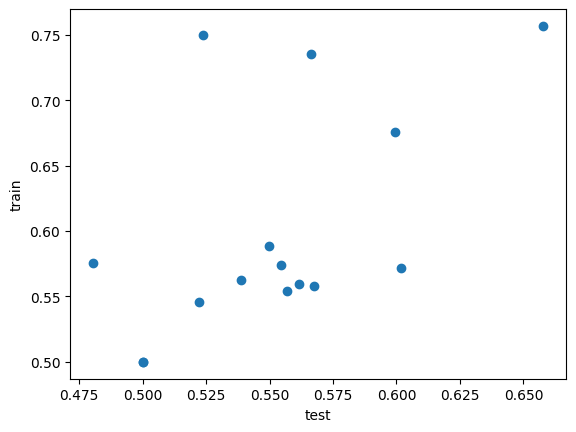

In [65]:
plt.xlabel('test')
plt.ylabel('train')
plt.scatter(score_test ,score_train)


We can classify the learning performance of the models into three groups:

- Fail to learn anything.
- Overfit.
- Succeeded in learning some generalized rules.

## ROC Curve and Confusion Matrix

To compare the performance of the method with other approaches, I will visualize  of the model the preform the best using ROC curves and confusion matrices.

In [53]:

def ruc_accuracy(data_loader,model, metric):
    """
    applay the data spesfic metric before ploting
    """
    pred = []
    labels = []
    
    for batch in data_loader:
        X, Y = batch
        pred.append(model(X))
        labels.append(Y)
    
    pred = torch.cat(pred, dim=0)
    labels = torch.cat(labels, dim=0)
    metric.update(pred.view(labels.shape), labels.type(torch.int64))
    
    return metric

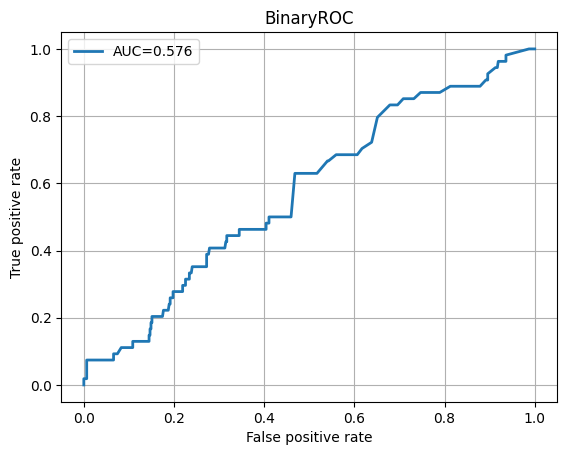

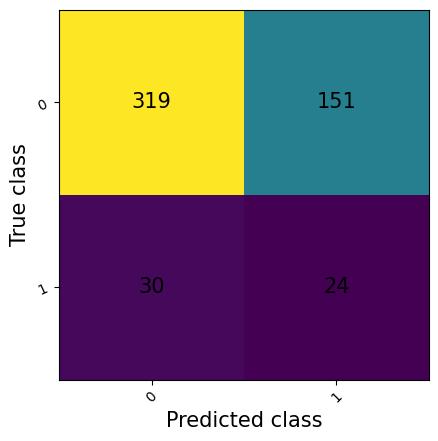

In [54]:

roc_curve = ruc_accuracy(  data_tensor.test_dataloader(),best_model ,BinaryROC(thresholds=None))
confusion_metrix = ruc_accuracy(  data_tensor.test_dataloader(),best_model ,ConfusionMatrix(task="binary"))


fig_, ax_ = roc_curve.plot(score=True)
fig_, ax_ = confusion_metrix.plot()
plt.show()




## Discrepant Results from Previous Runs 
The results obtained in this run significantly differ from those observed in earlier iterations of this model. Despite selecting a model that demonstrated strong performance on the validation set, it appears to perform notably worse on the test set. It is noteworthy to mention that in earlier runs, the model exhibited an under roc curve score around 0.7, which, while lower than other methods, was considerably better than the current performance. These findings point to an uncommon occurrence of validation overfitting through model selection. To delve deeper into this phenomenon, I will visualize the results on the validation set.







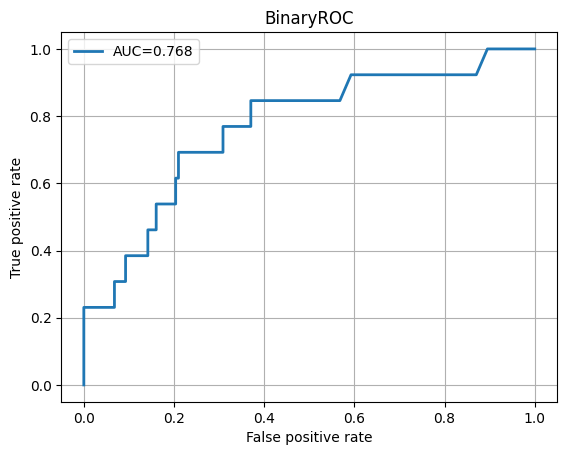

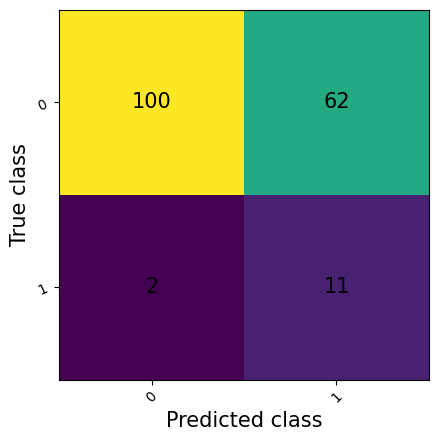

In [64]:
roc_curve = ruc_accuracy(  data_tensor.validate_dataloader(),best_model ,BinaryROC(thresholds=None))
confusion_metrix = ruc_accuracy(  data_tensor.validate_dataloader(),best_model ,ConfusionMatrix(task="binary"))

fig_, ax_ = roc_curve.plot(score=True)
fig_, ax_ = confusion_metrix.plot()
plt.show()



## Validation Overfitting Analysis
Upon reviewing the model's performance, it is evident that it performs quite well on the validation test but exhibits poor results on the actual test set. This discrepancy was not observed in earlier runs of the code, and initially, my inclination was to rerun it to obtain more consistent results. However, upon thoughtful consideration, I opted to retain this outcome as a valuable learning experience. It highlights a nuanced aspect of the validation set—despite not being part of the learning process, it can inadvertently contribute to overfitting when used for model selection.

After experimenting with the model for some time, I can assert that such instances are relatively uncommon. Most of the time, the model performs equally well on both the validation and test sets, yielding results around 0.7. Consequently, I will use the overall performance metric of 0.7 when comparing this model to others.

## note 
I was all set for submission when I chose to run the code once more to maintain continuity. Surprisingly, the results differed significantly from the previously observed ones. While I aim to present the latest outcomes, when I compare to other methodes I'll rely on the earlier results for the sake of conciseness, as they exhibited greater consistency across multiple runs.
# Method Comparison

In summarizing the results, the most effective method appears to be the simple heuristic feature extraction coupled with a multi-layer perceptron. Further investigation could explore additional promising heuristics to enhance this method. Following closely is the feature extraction through node embedding coupled with random forest, with specialized methods for network such as node2vec performing slightly better than the more general PCA method. Subsequently, the performance of highly complex Graph Neural Networks (GNN) was somewhat disappointing, lagging behind (and in the last time that I run this code porer even then the SBM as result of validtion overfittin), and the Structural Block Model (SBM) yielded very poor results.

There are two possible explanations for the relatively poor performance of the GNN. Firstly, it may be connected to subtle details in its architecture. Throughout its development, considerable trial and error was involved to enable it to produce any results. It is acknowledged that additional efforts, perhaps with more experience, might lead to significant improvements (considering it's the first time implementing deep learning). Secondly, the size of the network, which also represents the amount of data. In machine learning, complex models tend to perform well with larger datasets. Attempts were made to implement the GNN with fewer parameters than common, but it's plausible that this model, in general, is too complex for the size of the dataset. Further investigation should explore the application of GNNs in larger, more complex, and possibly multi-layered networks.


# transfer learning
I aim to conduct a final examination within this project, focusing on transfer learning across ecologically akin systems. Transfer learning involves utilizing patterns identified in one domain, such as the pollination network of dofnina in our case, to predict outcomes in another domain, in our case the pollination network in a different locale.

In this particular context, transfer learning proves advantageous not only for capitalizing on the substantial amount of data available in select locations, predominantly natural reserves in developed nations, to build a network in areas with limited data due to challenging environmental, geographical, and political factors. It also facilitates the exploration of ecosystem similarities and differences by examining the recurring patterns that emerge. 

For that, I will use the model that I trained with the most effective method (feature extraction coupled with an MLP) to predict connection in the pollination network in a natural areas close to Delphi city in Greek 

## the delphi pollintion network 

even that transfer learning is particularly beneficial when it comes to enhancing networks with limited data. Naturally, I plan to assess its performance on a network that possesses abundant high-quality data, allowing for a meaningful comparison and evaluation of predictions against reliable data. The chosen network should ideally share a climate as closely as possible with the target area, yet remain distinct enough to avoid being classified as a one ecosystem. To meet these criteria, I will be utilizing the Delphi dataset a comprehensive exploration of the pollination network within a natural area in proximity to the city of Delphi in Greece.







In [55]:
df_del  = pd.read_csv("C://Users//יובל//Downloads//web-of-life_2023-12-02_205011//M_PL_015.csv")


# Recognize the 2 types of nodes
del_plant = df_del.index.values
del_insect = df_del.columns

# Build the diffrent area of the full matrix
insect_insect = pd.DataFrame(0, index=del_plant, columns=del_plant)
plant_plant = pd.DataFrame(0, index=del_insect, columns=del_insect)
insect_plant = df_del
plant_insect = df_del.transpose()

# Add all together
up = pd.concat([insect_insect, insect_plant], axis=1)
down = pd.concat([plant_insect, plant_plant], axis=1)

# Create the matrix
full_matrix = pd.concat([up, down], axis=0)
del_network = nx.from_pandas_adjacency(full_matrix)

del_data = Data(del_plant , del_insect , del_network , full_matrix)
# Compute degree sequence of the network with respect to the plant nodes
(insect_degree, plant_degree) = bipartite.degrees(del_network, del_plant)


## scale up

let take a look in the new network 

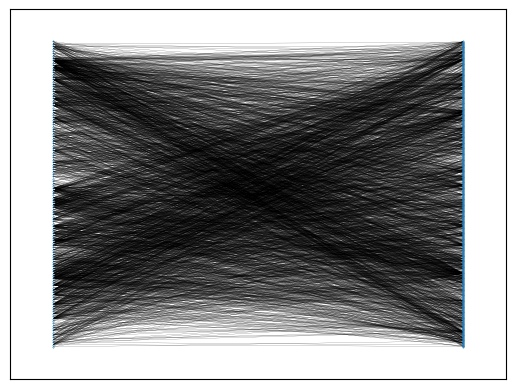

In [56]:
nx.draw_networkx(del_network,with_labels=False, pos = nx.drawing.layout.bipartite_layout(del_network, del_plant), width = 0.1 , node_size =0.1)

as you can see , the dataset is considerably larger, encompassing a greater number of insects, plants, and connections. It will be intriguing to observe whether the model trained on the dofnina network, despite the significant difference in scale, can still generate accurate predictions in this context.

## huristic  feature extraction for the delphi network 
of course to use the same model we need to extract the same feature 

In [57]:
feature_num = 4



#train set base on the data in dofina
shape_train = (data.y_train.size, feature_num)
shape_test = (del_data.y_test.size, feature_num)

x_train_feat = np.zeros(shape_train)
x_test_feat = np.zeros(shape_test)

x_train_feat = create_feature(data.x_train, x_train_feat , data.train_network())



#test set base on the data in deplhi
x_test_feat_del = create_feature(del_data.x_test, x_test_feat , del_data.train_network())
x_test_feat = np.zeros(shape_test)



## runing the MLP
now we can test the model, give attention the I train the model on tdofnina dataset and test it on delphi dataset 

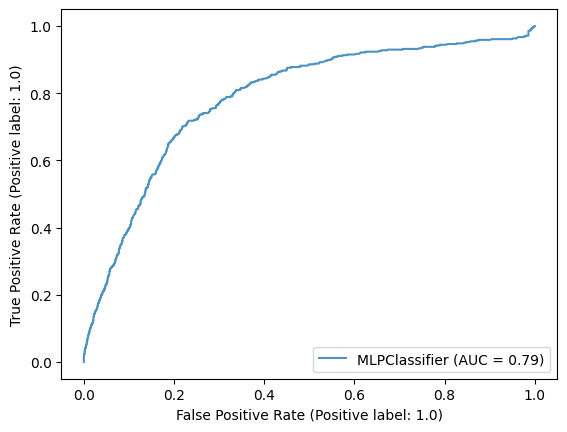

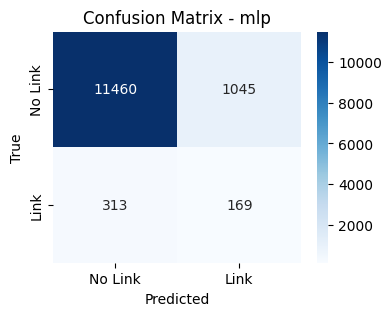

In [58]:
ax = plt.gca()
# train the model on the dofnina data set 
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40), max_iter=10000).fit(x_train_feat, data.y_train)

# test it preformence on the delphi data set
RocCurveDisplay.from_estimator(mlp, x_test_feat_del, del_data.y_test, ax=ax, alpha=0.8)
y_pred = mlp.predict(x_test_feat_del)
matrix = confusion_matrix( del_data.y_test, y_pred)
        
# Plot the confusion matrix and roc cureve
plt.figure(figsize=(4, 3))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Link', 'Link'], yticklabels=['No Link', 'Link'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - mlp')
plt.show()

## result

As indicated by the outcomes, the model excels in accurately predicting connections within the Delphi network, despite being trained on a distinct ecological system situated thousands of kilometers away from it and being considerably smaller in terms of both species and connections. This illustrates that, even with the remarkable diversity in species and ecosystems, patterns often persist from one ecosystem to another. Additionally, it underscores the high feasibility of transfer learning in this specific context.


# Conclusion
I initiated the project by delving into the exploration of my data concerning the Dofnina National Park pollination network. I discovered that the pollination network exhibits a highly structured nature, characterized by a power-law distribution in node degree and a strong indication of co-evolutionary processes in network creation. These findings fueled my optimism about the possibility of predicting links based on the network structure. With this understanding, I transitioned to the task of predicting links.

In the bridge between exploratory data analysis (EDA) and link prediction, I employed stochastic block modeling, which performed poorly as a link predictor but enriched my insights gained from the EDA stage. Subsequently, I explored various methods of feature extraction coupled with simple machine learning.

## Feature Extraction
- __Node2Vec__:
I commenced with the node embedding algorithm designed specifically to extract features about the role of different nodes in the network, both locally and globally. It performed optimally when coupled with random forest, yielding an overall satisfactory result (ROC curve: 0.76).

- __Principal Component Analysis__ (PCA):
Moving on, I tested the performance of a general algorithm widely used in many data science areas, PCA. Surprisingly, it performed almost as well as Node2Vec (ROC curve: 0.74) and demonstrated the best performance when coupled with random forest.

- __Heuristic Feature Extraction__:
For the final attempt at feature extraction, I employed four simple heuristics for each pair, including the degree of the target and source node, common square count (bipartite version for common neighbors), and the shortest path between them. This method exhibited excellent performance (ROC curve: 0.83) and performed best when coupled with MLP.

- __Graph Neural Network__
Encouraged by the success of heuristic feature extraction, I ventured into using an autoencoder to autonomously identify and utilize the best features. This required delving into the more complex realm of graph neural networks and deep learning. The implemented algorithm, SEAL (based on node labeling and message passing), proved to be challenging. However, even after overcoming these challenges, the results were disappointing compared to other methods, possibly due to the dataset being too small for such a complex model.

## Transfer Learning
Given the outstanding performance of heuristic feature extraction, I explored its efficacy in transfer learning. I obtained another dataset of a pollination network from Delphi, Greece, trained the model on the Dofnina network dataset, and then used it to make predictions on the Delphi network dataset. The model performed surprisingly well (ROC curve: 0.79).

## Further Research

- __Combined Methods of Feature Extraction:__
Combining different feature extraction methods, each offering unique insights into the data, may potentially outperform individual methods.

- __Exploration of Additional Heuristics:__
The heuristic feature extraction showed promising results with only four features. Identifying more useful features could further enhance its performance.

- __Testing Graph Neural Networks on Larger Ecological Networks:__
To validate the scalability of graph neural networks, testing on larger ecological networks is essential. The current example involved a small, simple network, and expanding to more extensive networks may provide valuable insights.


## Personal Reflection

Closing this project, I'm feeling a mix of emotions. I've learned a lot about staying humble. There were times I got a bit too confident—first, choosing to work alone, and then, taking on the challenge of GNN, a complex part of deep learning, without much experience in deep learining. These choices led to challenges, time management issues, and, most importantly, not achieving the success I aimed for. 

On the positive side, this project introduced me to the captivating world of link prediction with it unique chalnge and unique soultion. I gained insights into the complexities and wonders of ecosystems. Understanding how everything is connected to create a stable system was genuinely fascinating. Despite the setbacks, I'm somehow happy about trying to implement GNN for link prediction. Even though I didn't entirely succeed, the experience enhanced my understanding of a beautiful and complex algorithm. It encouraged a naturally stimulating new way of thinking different from the approach of conventional machine learning, and in a field where a few dominant methods take over most tasks, finding a niche where specialized approaches are still dominant brings a sense of fulfillment.